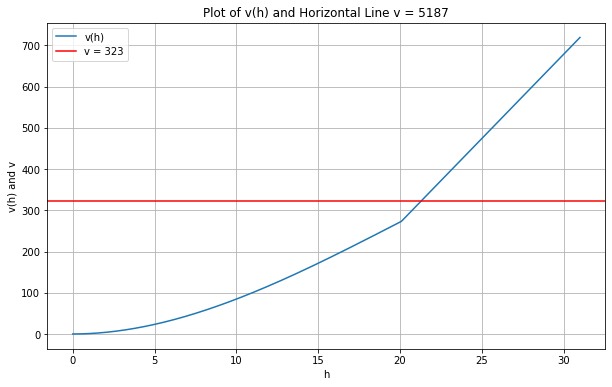

Intercept at h = 21.31 inches
Arm-to-waterline distance: 10.19 inches


In [7]:
import numpy as np
import matplotlib.pyplot as plt

"""This is a method of determining what the distance between the top of the mixer arm and the water line will
be once a specific volume has been added. Simply change the variable 'v' to the desired volume."""


v = 323 #Volume in liters


def v_of_h(h, delta = 20.17):
    return np.where(h < 20.1, ((3.14 * h**2) * (3 * delta - h) / 3)*0.016, 0.016*(21700 + 2 * 3.14 * delta**2 * (h - 21.9)))

threshold = 0.1 
h_intercept_alt = None
min_difference = float('inf')

for h in np.linspace(0, 31, 5000):
    difference = abs(v_of_h(h) - v)
    if difference < min_difference:
        min_difference = difference
        h_intercept_alt = h
        if difference <= threshold:
            break
            
h_values = np.linspace(0, 31, 1000)
v_values = v_of_h(h_values)

plt.figure(figsize=(10, 6))
plt.plot(h_values, v_values, label='v(h)')
plt.axhline(y=v, color='r', linestyle='-', label=f'v = {v}')
plt.title('Plot of v(h) and Horizontal Line v = 5187')
plt.xlabel('h')
plt.ylabel('v(h) and v')
plt.legend()
plt.grid(True)
plt.show()

print("Intercept at h =", round(h_intercept_alt, 2), "inches")

print("Arm-to-waterline distance:", round(31.5 - h_intercept_alt, 2), "inches")